In [ ]:
import numpy as np
import numpy.random as rand
from scipy.stats import poisson
import torch

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#mu(s) \prop e^{-||s||^2/2}, base intensity
# beta = time decay rate
# Sigma - dxd matrix
# s ( spatial component) in R^d
# element l in the list computes l^th generation of offsprings
# list[[l]] is a matrix of size N_lx(1+d)

In [ ]:
## parameters to generate
d=20
T = 3
alpha = 2.4 ## scaling constants
beta = 1.8

## triggering functions
gamma = 3.5
B = rand.multivariate_normal(mean = np.zeros(d), cov = np.identity(d), size=d)
Sigma = np.matmul(B, B.T)/2


## background intensity
mean_base = rand.uniform(low=0, high=1, size=d) ## mean in density for gaussian part of base intensity
S = np.diag(rand.uniform(low=1, high=2, size=d)) ## variance covariance matrix for gaussian part of base intensity
phi = 4

In [ ]:
## keep real parameters recorded
gamma_real = gamma
Sigma_real = Sigma
m_real = mean_base
S_real = S
phi_real = phi
alpha_real = alpha
beta_real = beta

In [ ]:
#generate the base intensity events
ST_hawkes = []
N0 = poisson.rvs(mu=alpha*(1-np.exp(-phi*T)), size=1)
N0 = int(N0)
G0 = np.zeros((N0,1+d))
G0[:,0] = rand.exponential(scale = 1/phi, size =N0) ## arrival times of background events
for i in range(N0):
    G0[i,1:(d+1)] =  rand.multivariate_normal(mean = mean_base, cov = S, size=1)[0]
accepted = [i for i,v in enumerate(G0[:,0]) if v <= T]
ST_hawkes.append(G0[accepted,:]) ## 0th element is the background generation G0 events

In [ ]:
#generate offspring levels
m = beta*(1-np.exp(-gamma*T)) # mean number of offspring
print(m)

1.7999504343911705


In [ ]:
# a function which generates offspringfs given a parent
 #give a vector of form (t,s) and get a matrix of its offsprings
def offspring(v):

    m = beta*(1-np.exp(-gamma*(T-v[0])))
    N = poisson.rvs(mu =m)
    if N==0:
        return "No babies!!"
    if N>0:
        O = np.zeros((N,1+d))
        O[:,0] = v[0]+rand.exponential(scale = 1/gamma)

    for i in range(N):
        O[i, 1:(d+2)] = v[1:(d+2)]+ rand.multivariate_normal(mean = np.zeros(d), cov = Sigma)

    accepted = [i for i,v in enumerate(O[:,0]) if v <= T]
    return O[accepted,:]

In [ ]:
#Number of generations M
l=0
p=1
c=0 # counter for events

while(p>0):

    parents = ST_hawkes[l] #matrix of(t,s) for generation l
    num_parents = np.shape(parents)[0] # number of events in gen l
    if num_parents ==0:
        break


    c=c+num_parents
    if num_parents==0:
        break
    kids = np.zeros((1,1+d)) #dummy 0 row

    for i in range(num_parents):
        vector = parents[i,:]
        temp = offspring(vector)

        if type(temp) != str:
            kids = np.concatenate((kids, temp), axis = 0)
            ##kids <- rbind(kids, temp)


    hello = kids[1:,:]

    if np.sum(np.shape(hello))==0: p=0
    ST_hawkes.append(hello)
    print("We are at generation "+str(l))
    print("Added "+ str(np.shape(hello)[0])+" offsprings")
    l=l+1

We are at generation 0
Added 8 offsprings
We are at generation 1
Added 15 offsprings
We are at generation 2
Added 35 offsprings
We are at generation 3
Added 69 offsprings
We are at generation 4
Added 118 offsprings
We are at generation 5
Added 209 offsprings
We are at generation 6
Added 346 offsprings
We are at generation 7
Added 537 offsprings
We are at generation 8
Added 733 offsprings
We are at generation 9
Added 947 offsprings
We are at generation 10
Added 1108 offsprings
We are at generation 11
Added 1152 offsprings
We are at generation 12
Added 1125 offsprings
We are at generation 13
Added 971 offsprings
We are at generation 14
Added 743 offsprings
We are at generation 15
Added 608 offsprings
We are at generation 16
Added 399 offsprings
We are at generation 17
Added 268 offsprings
We are at generation 18
Added 158 offsprings
We are at generation 19
Added 117 offsprings
We are at generation 20
Added 44 offsprings
We are at generation 21
Added 17 offsprings
We are at generation 22


In [ ]:
g=len(ST_hawkes) ## number of generations
occurances = np.zeros((1,d+1))
for i in range(g):
    Iwantthese= ST_hawkes[i]
    occurances = np.concatenate((occurances, Iwantthese))

Myoutput = occurances[1:,:]
Myoutput = Myoutput[Myoutput[:, 0].argsort()]

In [ ]:
np.shape(Myoutput) ## number of events x( 1+ dim of spatial points)

(9743, 21)

In [ ]:
#naming
#rownames(Myoutoput) <-c()
#colnames(Myoutoput) <- c("time", paste0("eta", c(1:d)))
#print(paste0("Total number of events is  ",c))
#View(Myoutoput)


In [ ]:
Myoutput

array([[ 5.47815659e-02,  5.24126541e-01, -1.42206907e-01,
         2.07681055e+00, -7.50129324e-01,  3.18098616e-01,
         3.93387153e-01,  5.75408215e-01,  8.12409665e-01,
        -1.30837658e+00,  1.21645168e-01],
       [ 2.05440119e-01,  6.32576988e-01,  4.33429550e+00,
         2.21997299e+00,  5.13266882e-01,  2.07629657e+00,
         8.55939068e-01,  1.91774438e+00,  1.28918740e+00,
        -7.67814508e+00, -3.20313221e+00],
       [ 3.00453103e-01,  5.01340693e+00,  3.80334791e+00,
         3.31865410e+00,  5.48787117e+00, -8.61026148e-01,
        -3.18437284e+00,  3.91701419e+00,  2.27233539e+00,
        -6.21435181e+00, -1.62797970e+00],
       [ 7.46106952e-01,  1.04785504e+00,  3.09826348e+00,
         5.27462762e+00,  4.36900795e+00,  7.40319244e-01,
        -6.31133622e+00,  3.75292454e+00,  3.31499876e+00,
        -7.05994993e+00, -1.22513248e+00],
       [ 9.11708759e-01, -2.12446057e+00, -1.37952934e+00,
         4.71250591e+00,  2.43530313e+00, -2.63481882e+00,
  

In [ ]:
## self attention code starts

In [ ]:
import torch as torch
torch.set_default_tensor_type(torch.DoubleTensor)

In [ ]:
#events = Myoutput #unscaled

In [ ]:
## Myoutput is the real spatial-temporal data
## events is scaled to [0,1]^d in space
spatial_part = Myoutput[:,1:]
spatial_part_scaled = (spatial_part-spatial_part.min(axis=0))/(spatial_part.max(axis=0)-spatial_part.min(axis=0))
events = np.column_stack((Myoutput[:,0], spatial_part_scaled))

In [ ]:
x = rand.multivariate_normal(mean = np.zeros(d), cov = np.diag(np.ones(d)))
t = 1.2
history = events[events[:,0] <= t]
past_num = np.shape(history)[0]

In [ ]:
def softmax(v):  # v is a vector
    v = v - torch.max(v)
    return torch.exp(v) / sum(torch.exp(v))

In [ ]:
## learnable parameters
d_k = 32
d_q = 32
d_v = 32
W_k = torch.randn((d+1,d_k), requires_grad = True)
W_q = torch.randn((d+1,d_q), requires_grad = True)
W_v = torch.randn((d+1,d_v), requires_grad = True)

In [ ]:
def self_attention(x,t,events,W_k,W_q,W_v):  # returns h(x), a 1xp tensor for self-attention calculated
    #past events
    history = events[events[:,0] <= t] #H_t
    past_num = np.shape(history)[0]

    ## calculate phi_l(z_i)'s
    W_v= W_v/5
    embeddings = torch.zeros((past_num,d_v))
    for i in range(past_num):
      point = torch.reshape(torch.tensor(history[i,:]), (1,1+d))
      ##W1 is W_v basically
      embeddings[i,:] = torch.matmul(point,W_v) ##needs gradients  # 1xd_v

    #calculate scores
    score = torch.zeros(past_num)

    current_point= torch.reshape(torch.tensor(np.append(t,x)), (1,1+d))
    query_current = torch.matmul(current_point,W_q) ##1xd_q
    for i in range(past_num):
      point = torch.reshape(torch.tensor(history[i,:]), (1,1+d))
      key_i = torch.matmul(point, W_k) #1xd_k
      score[i] = torch.matmul(key_i, query_current.T) #1x1
      #k_i = W_k*z_i
      # score should be torch.matmul(querry,k_i)



    score = softmax(score) #normalise

    return torch.matmul(score.reshape(1,past_num),embeddings)[0,:]  ##1 by d_v


In [ ]:
self_attention(x,t,events,W_k,W_q,W_v)

tensor([ 0.3389, -0.3154,  0.1891, -0.5695, -0.3315,  0.2631,  0.1115, -0.4552,
         0.7477,  0.6444,  0.0192,  0.2315,  0.2234, -0.1213,  0.1896,  0.2499,
        -0.5063,  0.2046,  0.4986,  0.2447,  0.4909,  0.1428,  0.5909, -0.5007,
        -0.0169,  0.0309, -0.4168, -0.2130, -0.1731, -0.0890, -0.4337,  0.1918],
       grad_fn=<SliceBackward0>)

In [ ]:
## list tensors should have 3M many tensors
M =4
list_tensors=[]
for i in range(3*M):
  list_tensors.append(torch.randn((d+1,d_k), requires_grad = True))

In [ ]:
def multihead_attention(x,t,events, list_tensors):
    ## calculate a list of attentions
    M = len(list_tensors)/3 #how many heads?
    M = int(M)
    attention_tensors = torch.zeros((1, int(M*d_k)))

    #concatenate self-attention tensors
    for i in range(M):
        operator = list_tensors[3*i:(3*i+3)]
        attention_tensors[0,i*d_k:(i*d_k+d_k)] = self_attention(x,t, events, W_k= operator[0],W_q= operator[1],W_v= operator[2])

    return attention_tensors[0,:]   ## h(x) = (h_1(x),h_2(x),...,h_M(x)) \in R^Mp

In [ ]:
## test case
h=multihead_attention(x,t,events, list_tensors)
h

tensor([-1.3240e-01, -2.5143e-01,  5.7526e-01,  1.3411e-01,  7.6759e-01,
         3.5590e-02, -2.4438e-01, -2.1431e-01,  4.1026e-02, -2.7890e-01,
        -1.1753e-01,  2.0103e-01, -1.0589e-02,  8.3885e-02,  2.0202e-02,
         6.5157e-02, -2.3198e-01,  4.9640e-01, -2.6844e-01, -6.0443e-01,
         9.8737e-02, -6.7483e-01,  1.0630e-01,  3.4750e-01,  1.2872e-01,
        -3.5103e-02, -1.2694e-01,  4.4441e-02,  2.0190e-01, -1.4602e-01,
         6.1836e-01, -2.0780e-01, -2.5514e-01,  6.0201e-01,  6.5091e-01,
         2.9117e-01,  8.1957e-02, -5.4332e-01, -3.2465e-01, -3.2146e-01,
        -3.5605e-01, -4.2197e-01,  6.5606e-01, -4.2939e-01, -2.1587e-01,
         1.6394e-02,  1.2225e-01,  5.7289e-01,  5.9469e-01, -4.8386e-02,
         3.4999e-01,  2.1351e-01, -4.0450e-01, -2.8173e-01,  6.0176e-01,
        -7.6900e-01, -1.4023e-01,  8.3496e-01, -1.4314e-01,  7.9286e-02,
         4.4514e-02,  1.0097e-01, -8.1050e-02,  2.1310e-01, -3.3989e-01,
         6.6123e-01, -1.4073e-01,  6.8437e-02,  8.3

In [ ]:
## works till here after July 27 modification

In [ ]:
## define backgriound density via feed forward neural network
import torch.nn as nn
import numpy as np

d=10
n_hidden = d_k
back_model = nn.Sequential(nn.Linear(d+1, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, 1),
                      nn.ReLU())

def background_intensity(x,t,back_model):  #datapoint = (x,t) \in R^{d+1}
    data_point = torch.tensor(np.append(x,t), requires_grad= False, dtype=torch.float64)

    return back_model(data_point)


In [ ]:
# model this triggering term by a neural net with input h(x) - the multihead attetion based
## representation
n_hidden = 32
trigger_model =  nn.Sequential(nn.Linear(M*d_k, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, 1),
                      nn.Softplus())

def triggering_intensity(x,t, events, list_tensors, trigger_model):
    h=multihead_attention(x,t,events, list_tensors)  ##h(x,t)
    return trigger_model(h)


In [ ]:
def intensity_attention(x,t, events, list_tensors, back_model, trigger_model):  ##softplus(h(x)'W_2+b)
    return background_intensity(x,t,back_model)+triggering_intensity(x,t, events, list_tensors, trigger_model)

In [ ]:
## test case
intensity_attention(x,t,events, list_tensors, back_model, trigger_model)
##works

tensor([0.7010], grad_fn=<AddBackward0>)

In [ ]:
#28th Jul works till here

In [ ]:
## integral \int_{X}\int_{0 to T} lambda(s,t)dsdt
def integral_of_intensity_attention(events, list_tensors, back_model, trigger_model):


    ## take X to be a very very large [L,U]^d
    U = np.max(events[:,1:])
    L = np.min(events[:,1:])
    num_samples = 1000
    vals = torch.zeros(num_samples)
    t_start = min(events[:,0]) ##first occurance time, t_start ~ 0

    for i in range(num_samples):
        point_coords = rand.uniform(low=L, high=U, size=d)
        time = rand.uniform(low=t_start, high=T, size=1)
        vals[i] = intensity_attention(point_coords,time, events, list_tensors, back_model, trigger_model)
        #if i%100==0:
        #    print("sample "+str(i)+" is done")

    #return torch.mean(vals)
    return torch.mean(vals)*T*pow(U-L,d)

In [ ]:
integral_of_intensity_attention(events, list_tensors, back_model, trigger_model)

tensor(389.0046, grad_fn=<MulBackward0>)

In [ ]:
def loglikelihood_attention(events, list_tensors, back_model, trigger_model):
    ## n = number of events
    n = np.shape(events)[0]
    s=0
    for i in range(n):  ## s = \sum log lambda(t_i,s_i)
        s =s + torch.log(intensity_attention(events[i,1:], events[i,0], events, list_tensors, back_model, trigger_model))
    ### include the integral term
    return s - integral_of_intensity_attention(events, list_tensors, back_model, trigger_model)

In [ ]:
## evaluate log likelihood
loglikelihood_attention( events, list_tensors, back_model, trigger_model) ## input scaled version of events

In [ ]:
##works

In [ ]:
import time
## list tensors should have 3M many tensors
M =4
list_tensors=[]
for i in range(3*M):
  list_tensors.append(torch.randn((d+1,d_k), requires_grad = True))

In [ ]:
 ## Optim SGD routie with multihead attention
# Pytorch autograd routine
import torch.optim as optim
# get the start time
st = time.time()
niter = 25
loglikelihoods_vals_optimizer = np.zeros(niter)
optimizer = optim.Adam(list_tensors+list(back_model.parameters())+list(trigger_model.parameters()) , lr = 0.02)

for i in range(niter):

    optimizer.zero_grad()
    cost = -loglikelihood_attention(events, list_tensors, back_model, trigger_model)
    loglikelihoods_vals_optimizer[i] = -cost

    if i%5==0:
        print("log likelihood is "+ str(-cost))

    cost.backward()
    optimizer.step()
    et = time.time()
    print("iter ", str(i), " done")
    print("time spent till iter ", str(i), " is ", (et-st)/60, " minutes")



log likelihood is tensor([-25.2276], grad_fn=<NegBackward0>)
iter  0  done
time spent till iter  0  is  0.3309767484664917  minutes
iter  1  done
time spent till iter  1  is  0.6676573634147644  minutes
iter  2  done
time spent till iter  2  is  1.0155089815457663  minutes
iter  3  done
time spent till iter  3  is  1.3582218766212464  minutes
iter  4  done
time spent till iter  4  is  1.7226364731788635  minutes
log likelihood is tensor([129.2204], grad_fn=<NegBackward0>)
iter  5  done
time spent till iter  5  is  2.066557999451955  minutes
iter  6  done
time spent till iter  6  is  2.4056400855382285  minutes
iter  7  done
time spent till iter  7  is  2.75621235370636  minutes
iter  8  done
time spent till iter  8  is  3.105373406410217  minutes
iter  9  done
time spent till iter  9  is  3.4454946001370748  minutes
log likelihood is tensor([183.2792], grad_fn=<NegBackward0>)
iter  10  done
time spent till iter  10  is  3.7993492205937702  minutes
iter  11  done
time spent till iter  1

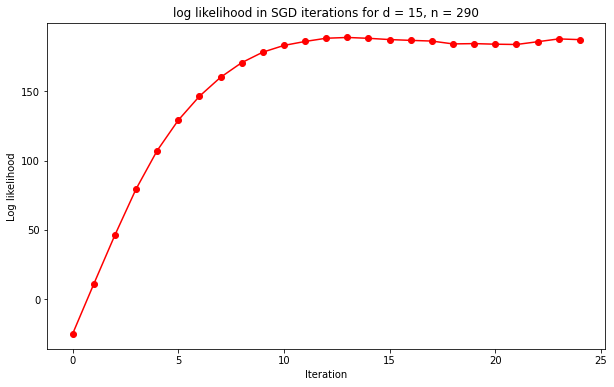

In [ ]:
# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.plot(np.arange(0,niter),
        loglikelihoods_vals_optimizer,
        marker = 'o',
        color = 'red')

# Set plot title and axes labels
ax.set(title = "log likelihood in SGD iterations for d = 15, n = 290",
       xlabel = "Iteration",
       ylabel = "Log likelihood")

plt.show()